In [51]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import keras
print("keras version: ", keras.__version__)

import tensorflow as tf
print("tensoflow version: ", tf.__version__)

keras version:  2.12.0
tensoflow version:  2.12.0


In [52]:
import random
random.seed(42)
tf.random.set_seed(42)
np.random.seed(42)

In [53]:
train = "/kaggle/input/terrain-recognition/Data Main/train"
test = "/kaggle/input/terrain-recognition/Data Main/test"
val = "/kaggle/input/terrain-recognition/Data Main/val"

In [54]:
image_path = "/kaggle/input/terrain-recognition/Data Main/train/Rocky/Rocky (1)_0_25.png"
img = cv2.imread(image_path, 0)
img.shape

(256, 256)

In [55]:
train_names = []
train_names = [f for f in sorted(os.listdir(train))]

print(len(train_names)) 

4


In [56]:
test_names = []
test_names = [f for f in sorted(os.listdir(test))]

print(len(test_names)) 

4


In [57]:
val_names = []
val_names = [f for f in sorted(os.listdir(val))]

print(len(val_names)) 

4


In [58]:
print("Categories:")
for i in train_names:
    print(i)

Categories:
Grassy
Marshy
Rocky
Sandy


In [59]:
category_dict1 = {}
images_per_category_dict1 = {}
category_images_path_dict1 = {}

total_images = 0

for i in range(len(train_names)):
    folder_path = train + '/' + str(train_names[i])
    category_dict1[i] = train_names[i]

    image_names = [img for img in sorted(os.listdir(folder_path))]
    
    images_per_category_dict1[i] = len(image_names)
    category_images_path_dict1[i] = image_names
    
    print('%s: %d' %(train_names[i], images_per_category_dict1[i]))
    total_images += images_per_category_dict1[i]
    
print('Total images in training data: %d' %(total_images))

Grassy: 8512
Marshy: 7727
Rocky: 7668
Sandy: 7664
Total images in training data: 31571


In [60]:
category_dict2 = {}
images_per_category_dict2 = {}
category_images_path_dict2 = {}

total_images = 0

for i in range(len(test_names)):
    folder_path = test + '/' + str(test_names[i])
    category_dict2[i] = test_names[i]

    image_names = [img for img in sorted(os.listdir(folder_path))]
    
    images_per_category_dict2[i] = len(image_names)
    category_images_path_dict2[i] = image_names
    
    print('%s: %d' %(test_names[i], images_per_category_dict2[i]))
    total_images += images_per_category_dict2[i]
    
print('Total images in validation data: %d' %(total_images))

Grassy: 1824
Marshy: 1657
Rocky: 1644
Sandy: 1644
Total images in validation data: 6769


In [61]:
category_dict3 = {}
images_per_category_dict3 = {}
category_images_path_dict3 = {}

total_images = 0

for i in range(len(test_names)):
    folder_path = test + '/' + str(test_names[i])
    category_dict3[i] = test_names[i]

    image_names = [img for img in sorted(os.listdir(folder_path))]
    
    images_per_category_dict3[i] = len(image_names)
    category_images_path_dict3[i] = image_names
    
    print('%s: %d' %(val_names[i], images_per_category_dict3[i]))
    total_images += images_per_category_dict3[i]
    
print('Total images in test data: %d' %(total_images))

Grassy: 1824
Marshy: 1657
Rocky: 1644
Sandy: 1644
Total images in test data: 6769


In [70]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(224, 224),
        #batch_size = 128,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        val,
        target_size=(224, 224),
        #batch_size = 128,
        class_mode='categorical')

Found 31571 images belonging to 4 classes.
Found 6765 images belonging to 4 classes.


In [84]:
from keras.models import Sequential
from keras import layers
# model = Sequential()
# model.add(layers.Conv2D(128, (5, 5), activation = 'relu', input_shape = (128, 128, 3)))
# model.add(layers.Conv2D(128, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size = (2, 2)))
# model.add(layers.Dropout(0.25))
          
# model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size = (2, 2)))
# model.add(layers.Dropout(0.25))
# model.add(layers.Flatten())                   
# model.add(layers.Dense(512, activation = 'relu'))
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(4, activation = 'softmax'))

model = tf.keras.applications.resnet.ResNet50(include_top=False)

In [85]:
model.trainable = False
for layer in model.layers[30:]:
    layer.trainable = True
# model.summary()

In [86]:
model1 = Sequential([
    model,
    layers.GlobalMaxPooling2D(),
    layers.Dense(512, activation  ="relu"),
    layers.Dense(4, activation = "softmax")
])


In [87]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_max_pooling2d_5 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
 dense_12 (Dense)            (None, 512)               1049088   
                                                                 
 dense_13 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
_________________________________________________________________


In [92]:
from keras import optimizers
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate = 0.0001), metrics=['accuracy'])

In [93]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

In [94]:
history = model1.fit(train_generator, epochs = 100, validation_data = test_generator, verbose = 1, validation_steps = 64, callbacks = early_stopping)

Epoch 1/100
987/987 [==============================] - 167s 165ms/step - loss: 0.7963 - accuracy: 0.7793 - val_loss: 0.4682 - val_accuracy: 0.8340
Epoch 2/100
987/987 [==============================] - 153s 155ms/step - loss: 0.4417 - accuracy: 0.8410 - val_loss: 0.3354 - val_accuracy: 0.8696
Epoch 3/100
987/987 [==============================] - 151s 153ms/step - loss: 0.3665 - accuracy: 0.8627 - val_loss: 0.4107 - val_accuracy: 0.8628
Epoch 4/100
987/987 [==============================] - 152s 154ms/step - loss: 0.3350 - accuracy: 0.8719 - val_loss: 0.2699 - val_accuracy: 0.8960
Epoch 5/100
987/987 [==============================] - 151s 153ms/step - loss: 0.3050 - accuracy: 0.8837 - val_loss: 0.2566 - val_accuracy: 0.9033
Epoch 6/100
987/987 [==============================] - 156s 158ms/step - loss: 0.2773 - accuracy: 0.8925 - val_loss: 0.2554 - val_accuracy: 0.9019
Epoch 7/100
987/987 [==============================] - 152s 154ms/step - loss: 0.2589 - accuracy: 0.8986 - val_loss: 0

In [102]:
history.history

{'loss': [0.7962943911552429,
  0.44165098667144775,
  0.36649230122566223,
  0.3350134491920471,
  0.3050421476364136,
  0.2773204743862152,
  0.25892361998558044,
  0.23905321955680847,
  0.22211900353431702,
  0.20998990535736084,
  0.19994418323040009,
  0.1930435597896576,
  0.185386061668396,
  0.17978186905384064,
  0.1668274849653244,
  0.16136373579502106,
  0.1548703908920288,
  0.14178985357284546],
 'accuracy': [0.7792910933494568,
  0.8410249948501587,
  0.8627220988273621,
  0.8719077706336975,
  0.8836590647697449,
  0.8924962878227234,
  0.8985778093338013,
  0.9077317714691162,
  0.9127680659294128,
  0.9182794094085693,
  0.9234107136726379,
  0.9258180260658264,
  0.9284152984619141,
  0.9319628477096558,
  0.9366190433502197,
  0.9376959800720215,
  0.9405150413513184,
  0.9468499422073364],
 'val_loss': [0.4681987762451172,
  0.3354302644729614,
  0.4106566309928894,
  0.26988598704338074,
  0.25656548142433167,
  0.25535422563552856,
  0.2445237785577774,
  0.2707

Text(0.5, 0, 'epoch')

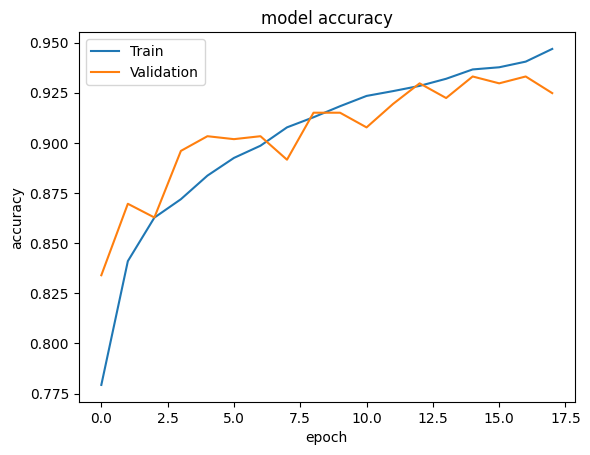

In [95]:
val_acc = history.history["val_accuracy"]
acc = history.history["accuracy"]

plt.plot(acc)
plt.plot(val_acc)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [103]:
model1.save("Model.keras")
import pandas as pd
df = pd.DataFrame(history.history)
df.to_csv("History.csv")